In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans

In [37]:
df_path = r"C:\Users\XT286AX\OneDrive - EY\Desktop\deposito__Montresori\datasets\Wholesale customers data.csv"
df = pd.read_csv(df_path)

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [38]:
df.drop(["Channel", "Region"], axis=1, inplace=True)
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)

In [39]:

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


In [41]:
eps_selected = 0   #we find the correct choice of eps
min_samples = 4 #rule of thumb, min points to form a shape that encloses space
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

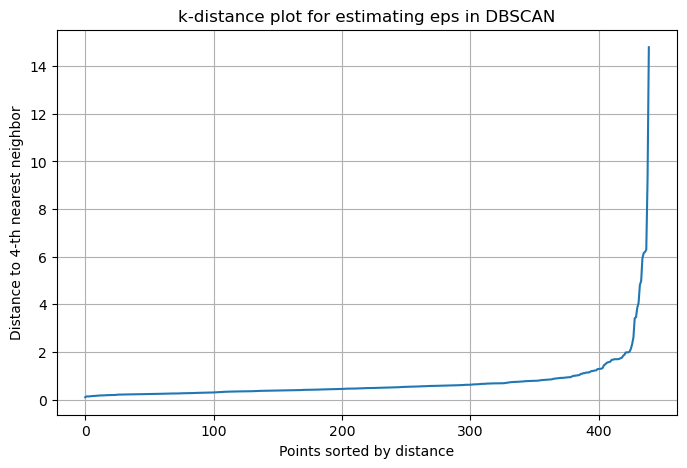

In [42]:
k_distances = distances[:, min_samples - 1]

# 5. Sort distances in ascending order
k_distances_sorted = np.sort(k_distances)

# 6. Plot the k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(k_distances_sorted)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {min_samples}-th nearest neighbor")
plt.title("k-distance plot for estimating eps in DBSCAN")
plt.grid(True)
plt.show()

Da una distanza maggiore di 2, i cluster diventano più sparsi, quindi la usiamo come estimatore di eps

In [43]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

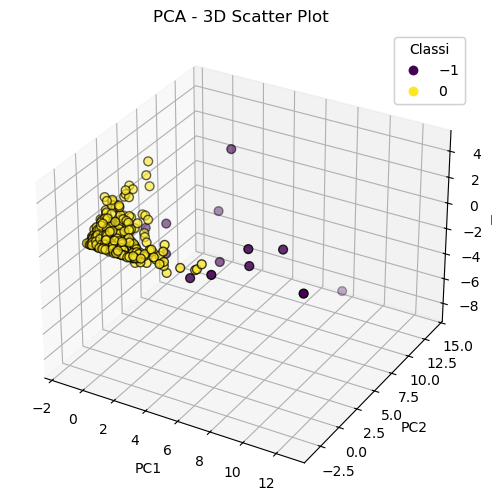

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=dbscan_labels, cmap='viridis', edgecolor='k', s=40)


ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA - 3D Scatter Plot')


legend = ax.legend(*scatter.legend_elements(), title="Classi")
ax.add_artist(legend)

plt.show()
